In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

try:
    df = pd.read_csv('train.csv')
except FileNotFoundError:

    print("Error: Please upload the 'train.csv' file to Google Colab before running.")

    df = pd.DataFrame({'SalePrice': np.random.normal(180000, 50000, 1000)})
    df = df[df['SalePrice'] > 0]

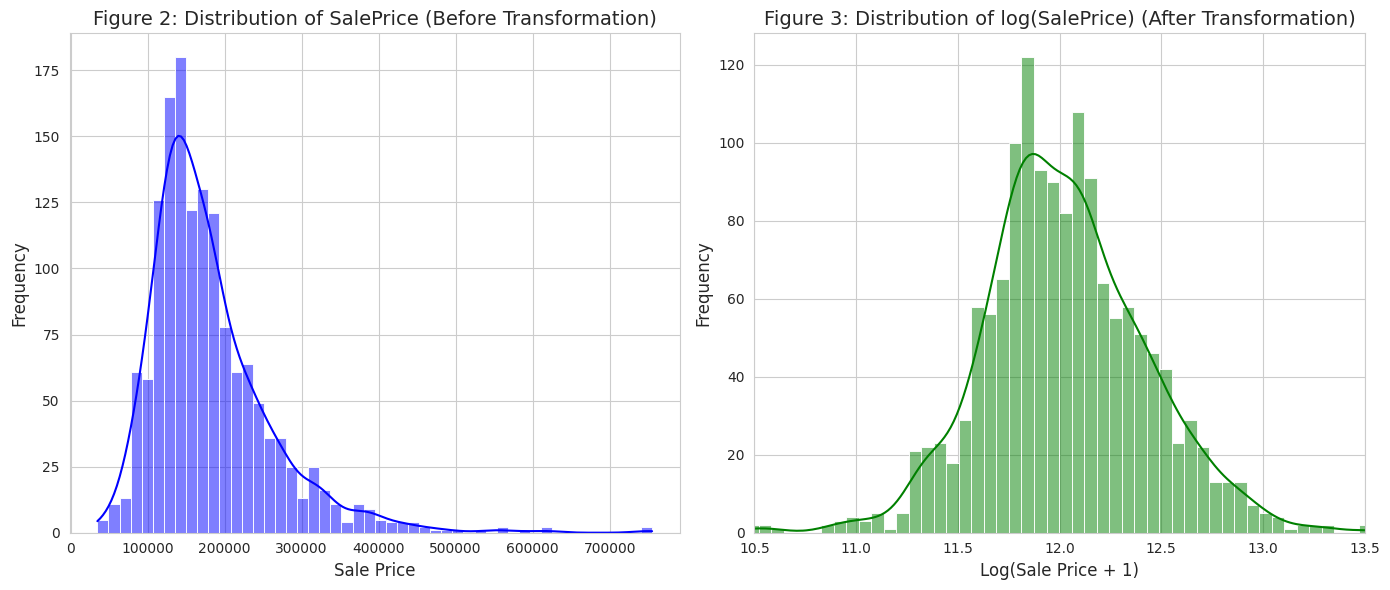

In [5]:
sns.set_style("whitegrid")

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['SalePrice'], kde=True, bins=50, color='blue')
plt.xlabel('Sale Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Figure 2: Distribution of SalePrice (Before Transformation)', fontsize=14)

plt.subplot(1, 2, 2)
log_price = np.log1p(df['SalePrice'])
sns.histplot(log_price, kde=True, bins=50, color='green')
plt.xlabel('Log(Sale Price + 1)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Figure 3: Distribution of log(SalePrice) (After Transformation)', fontsize=14)
plt.xlim(10.5, 13.5)

plt.tight_layout()
plt.show()

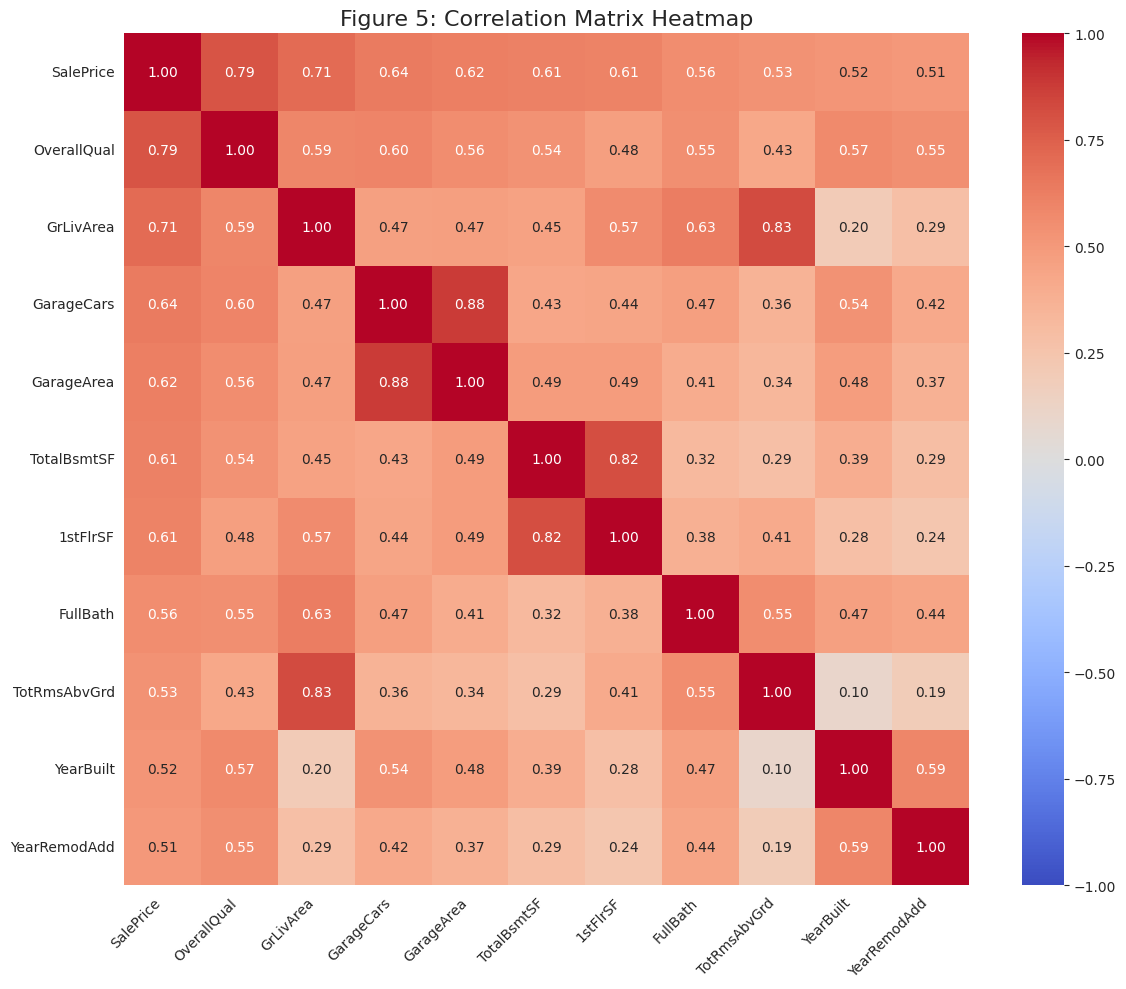

In [6]:
important_numeric_features = [
    'SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
    'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd'
]

existing_features = [col for col in important_numeric_features if col in df.columns]

if len(existing_features) > 1:

    corr_matrix = df[existing_features].corr()

    plt.figure(figsize=(12, 10))

    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Figure 5: Correlation Matrix Heatmap', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print("Skipping Figure 5: Not enough necessary numeric columns available.")

/tmp/ipython-input-6564961.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importances, palette='viridis')


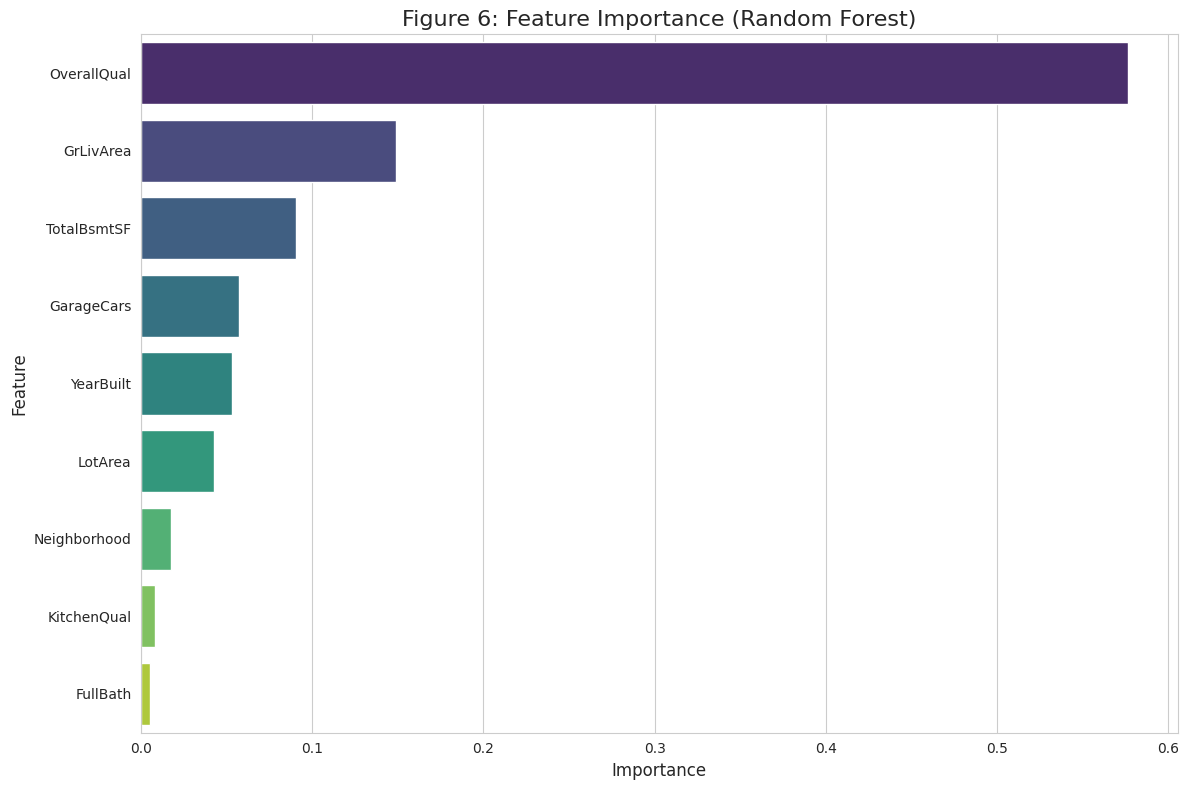

In [7]:
features_for_model = [
    'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars',
    'YearBuilt', 'FullBath', 'LotArea', 'Neighborhood', 'KitchenQual'
]

features_for_model = [col for col in features_for_model if col in df.columns]

if len(features_for_model) > 2 and 'SalePrice' in df.columns:
    df_model = df[features_for_model + ['SalePrice']].copy()

    for col in df_model.select_dtypes(include='number').columns:
        df_model[col] = df_model[col].fillna(df_model[col].median())

    for col in df_model.select_dtypes(include='object').columns:
        df_model[col] = df_model[col].fillna('None')
        df_model[col] = LabelEncoder().fit_transform(df_model[col])

    X = df_model.drop('SalePrice', axis=1)
    y = np.log1p(df_model['SalePrice'])

    rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    rf.fit(X, y)

    importances = pd.DataFrame({
        'Feature': X.columns,
        'Importance': rf.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=importances, palette='viridis')

    plt.title('Figure 6: Feature Importance (Random Forest)', fontsize=16)
    plt.xlabel('Importance', fontsize=12)
    plt.ylabel('Feature', fontsize=12)

    plt.tight_layout()
    plt.show()
else:
    print("Skipping Figure 6: Not enough data to train the model.")